# Assignment 4: Convolutional Neural Networks
* Carboni Leonardo (0279048)
* Bais Giacomo (5355583)

In [247]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LayerNormalization, BatchNormalization

from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model, to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [212]:
def plot_loss(hist, model_name):
    plt.plot(hist.history['loss'], label="Train")
    plt.plot(hist.history['val_loss'], label="Validation")
    plt.title(f"{model_name} train and validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}.png")
    plt.show()
    plt.plot(hist.history['accuracy'], label="Train")
    plt.plot(hist.history['val_accuracy'], label="Validation")
    plt.title(f"{model_name} train and validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}_accuracy.png")
    plt.show()
    return

# Data processing

In [213]:
# Load data
(x_train_and_val, y_train_and_val), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data in 0-1 range
x_train_and_val = x_train_and_val / 255.0
y_train_and_val = to_categorical(y_train_and_val)

x_test = x_test / 255.0
y_test = to_categorical(y_test)

In [214]:
# building a validation set (20% of the training set)
train_size = int(x_train_and_val.shape[0] * 0.8)
validation_size = x_train_and_val.shape[0] - train_size

x_validation, y_validation = (x_train_and_val[train_size:], y_train_and_val[train_size:])
x_train, y_train = (x_train_and_val[:train_size], y_train_and_val[:train_size])

In [215]:
img_width = 28
img_height = 28
num_classes = 10
channels = 1

models_statistics = []

# Baseline model
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

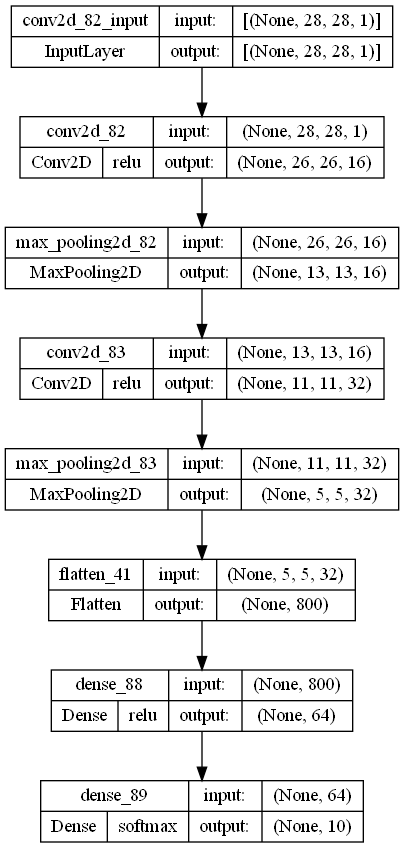

In [216]:

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_activations=True, to_file="./Models/baseline_model.png")

In [217]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5424 - accuracy: 0.8020 - val_loss: 0.4115 - val_accuracy: 0.8479
Epoch 2/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3734 - accuracy: 0.8656 - val_loss: 0.3514 - val_accuracy: 0.8758
Epoch 3/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3217 - accuracy: 0.8842 - val_loss: 0.3253 - val_accuracy: 0.8835
Epoch 4/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2877 - accuracy: 0.8947 - val_loss: 0.3065 - val_accuracy: 0.8866
Epoch 5/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2620 - accuracy: 0.9043 - val_loss: 0.2830 - val_accuracy: 0.8986
Epoch 6/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2417 - accuracy: 0.9104 - val_loss: 0.2714 - val_accuracy: 0.9039
Epoch 7/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2252 - accuracy: 0.9175 - val_loss: 0.2800 -

In [253]:
print('\nTraining accuracy:', np.max(history.history['accuracy']))
print('\nValidation accuracy:', np.max(history.history['val_accuracy']))

# in depth evaluation for the last model trained
predictions = model.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9489583373069763

Validation accuracy: 0.9084166884422302
375/375 [==============================] - 2s 4ms/step
Precision:  0.9035570231730319
Recall:  0.9015289920466009


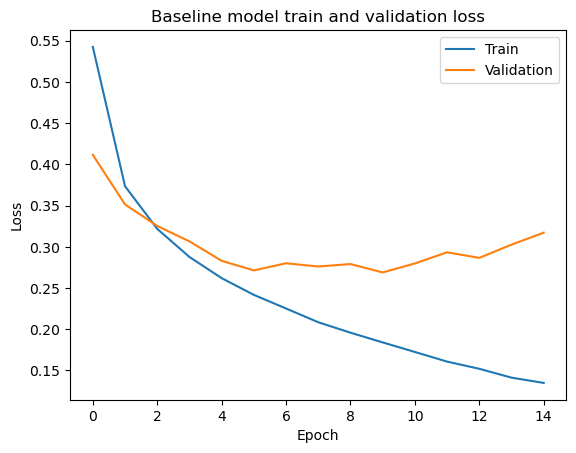

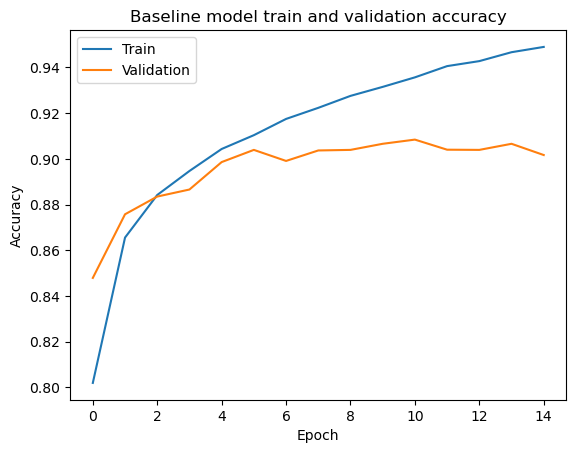

In [219]:
plot_loss(history, "Baseline model")

# Model 2: dropout layer
1. input
2. convolution
3. pooling
4. dropout
5. convolution
6. pooling
7. dropout
8. flatten
9. dense
10. dropout
11. output

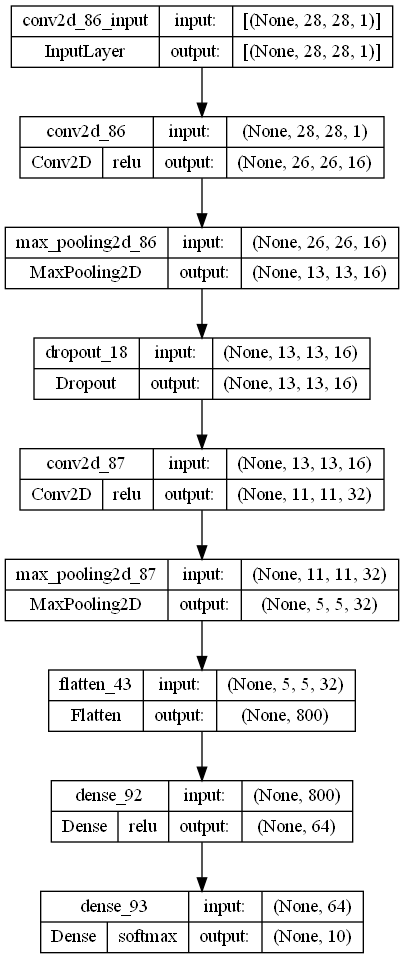

In [220]:

model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
# model2.add(Dropout(0.3))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model2, show_shapes=True, show_layer_activations=True, to_file="./Models/model2.png")

In [221]:
history2 = model2.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 25s 15ms/step - loss: 0.5919 - accuracy: 0.7825 - val_loss: 0.4146 - val_accuracy: 0.8520
Epoch 2/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.4101 - accuracy: 0.8484 - val_loss: 0.3776 - val_accuracy: 0.8601
Epoch 3/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3623 - accuracy: 0.8671 - val_loss: 0.3611 - val_accuracy: 0.8654
Epoch 4/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3294 - accuracy: 0.8776 - val_loss: 0.3031 - val_accuracy: 0.8901
Epoch 5/15
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3055 - accuracy: 0.8886 - val_loss: 0.2973 - val_accuracy: 0.8899
Epoch 6/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2901 - accuracy: 0.8919 - val_loss: 0.2948 - val_accuracy: 0.8917
Epoch 7/15
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2765 - accuracy: 0.8978 - val_loss: 0.2689 -

In [222]:
print('\nTraining accuracy:', np.max(history2.history['accuracy']))
print('\nValidation accuracy:', np.max(history2.history['val_accuracy']))

predictions = model2.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9181041717529297

Validation accuracy: 0.9109166860580444
375/375 [==============================] - 2s 5ms/step
Precision:  0.9126503520304163
Recall:  0.9110299336569359


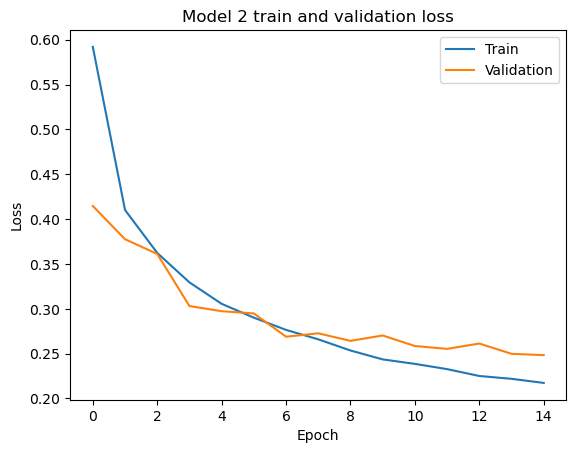

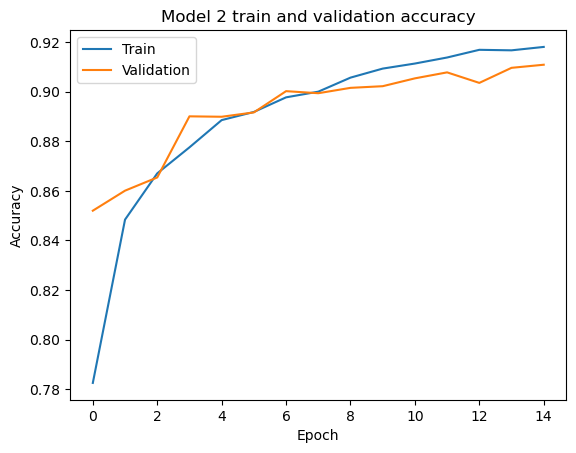

In [223]:
plot_loss(history2, "Model 2")

# Model 3: Double fully connected layer
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. dense
9. output

In [224]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model3, show_shapes=True, show_layer_activations=True, to_file="./Models/model3.png")

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_44 (Flatten)        (None, 800)               0         
                                                                 
 dense_94 (Dense)            (None, 64)              

In [225]:
history3 = model3.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5627 - accuracy: 0.7923 - val_loss: 0.4262 - val_accuracy: 0.8457
Epoch 2/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3675 - accuracy: 0.8670 - val_loss: 0.3579 - val_accuracy: 0.8718
Epoch 3/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3200 - accuracy: 0.8835 - val_loss: 0.3173 - val_accuracy: 0.8858
Epoch 4/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2848 - accuracy: 0.8947 - val_loss: 0.3234 - val_accuracy: 0.8821
Epoch 5/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2620 - accuracy: 0.9031 - val_loss: 0.2908 - val_accuracy: 0.8932
Epoch 6/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2436 - accuracy: 0.9094 - val_loss: 0.2720 - val_accuracy: 0.8990
Epoch 7/15
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2260 - accuracy: 0.9156 - val_loss: 0.2715 -

In [226]:
print('\nTraining accuracy:', np.max(history3.history['accuracy']))
print('\nValidation accuracy:', np.max(history3.history['val_accuracy']))

predictions = model3.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9497291445732117

Validation accuracy: 0.9070833325386047
375/375 [==============================] - 2s 4ms/step
Precision:  0.9070075695027088
Recall:  0.9060336779062854


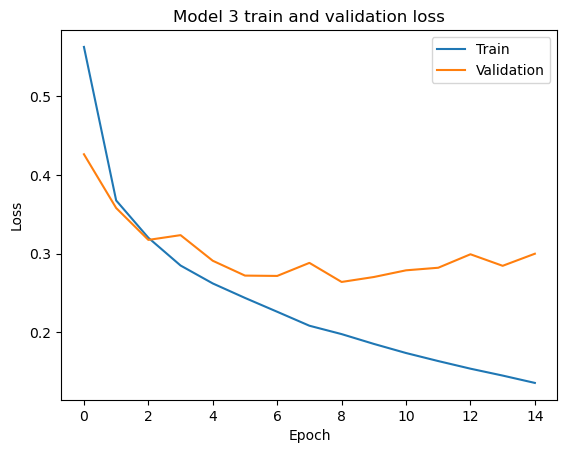

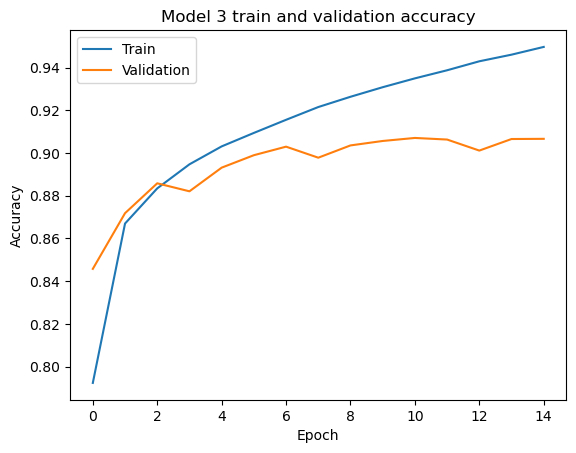

In [227]:
plot_loss(history3, "Model 3")

# Model 4: Layer Normalization
1. input
2. convolution
3. layer normalization
4. pooling
5. convolution
6. layer normalization
7. pooling
8. flatten
9. dense
10. output

In [ ]:
model4 = Sequential()
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model4.add(LayerNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(LayerNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model4, show_shapes=True, show_layer_activations=True, to_file="./Models/model4.png")
# model4.summary()

In [249]:
history4 = model4.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 31s 19ms/step - loss: 0.4171 - accuracy: 0.8481 - val_loss: 0.3331 - val_accuracy: 0.8775
Epoch 2/15
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2922 - accuracy: 0.8918 - val_loss: 0.3963 - val_accuracy: 0.8507
Epoch 3/15
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2501 - accuracy: 0.9074 - val_loss: 0.3093 - val_accuracy: 0.8859
Epoch 4/15
1500/1500 [==============================] - 29s 20ms/step - loss: 0.2206 - accuracy: 0.9175 - val_loss: 0.3036 - val_accuracy: 0.8901
Epoch 5/15
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1994 - accuracy: 0.9252 - val_loss: 0.2704 - val_accuracy: 0.9056
Epoch 6/15
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1803 - accuracy: 0.9310 - val_loss: 0.3428 - val_accuracy: 0.8869
Epoch 7/15
1500/1500 [==============================] - 29s 20ms/step - loss: 0.1625 - accuracy: 0.9383 - val_loss: 0.2805 -

In [ ]:
print('\nTraining accuracy:', np.max(history4.history['accuracy']))
print('\nValidation accuracy:', np.max(history4.history['val_accuracy']))

predictions = model4.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))

In [ ]:
plot_loss(history4, "Model 4")

# Model 5: Lower Learning rate
Same as baseline model, but with a lower learning rate
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

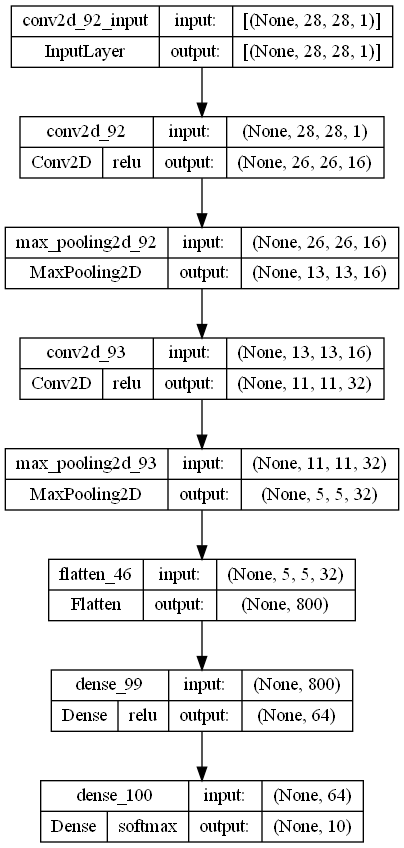

In [232]:
model5 = Sequential()
model5.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
plot_model(model5, show_shapes=True, show_layer_activations=True, to_file="./Models/model5.png")

In [233]:
history5 = model5.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5895 - accuracy: 0.7873 - val_loss: 0.4567 - val_accuracy: 0.8339
Epoch 2/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3932 - accuracy: 0.8595 - val_loss: 0.3745 - val_accuracy: 0.8652
Epoch 3/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3475 - accuracy: 0.8743 - val_loss: 0.3495 - val_accuracy: 0.8712
Epoch 4/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3181 - accuracy: 0.8851 - val_loss: 0.3326 - val_accuracy: 0.8792
Epoch 5/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2960 - accuracy: 0.8930 - val_loss: 0.3015 - val_accuracy: 0.8907
Epoch 6/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2809 - accuracy: 0.8974 - val_loss: 0.2908 - val_accuracy: 0.8962
Epoch 7/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2634 - accuracy: 0.9043 - val_loss: 0.2881 -

In [234]:
print('\nTraining accuracy:', np.max(history5.history['accuracy']))
print('\nValidation accuracy:', np.max(history5.history['val_accuracy']))

predictions = model5.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9303125143051147

Validation accuracy: 0.9066666960716248
375/375 [==============================] - 2s 4ms/step
Precision:  0.9040077133523315
Recall:  0.9033609439432334


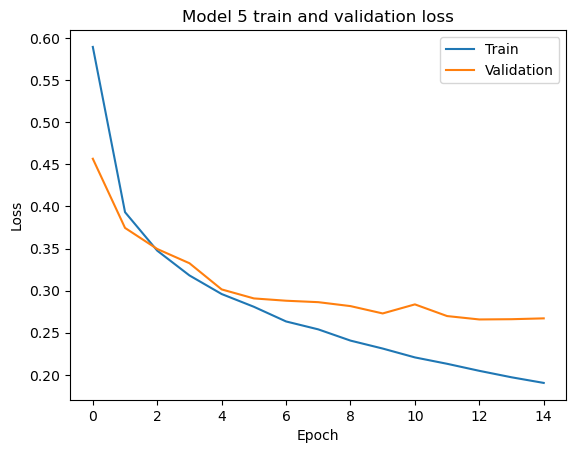

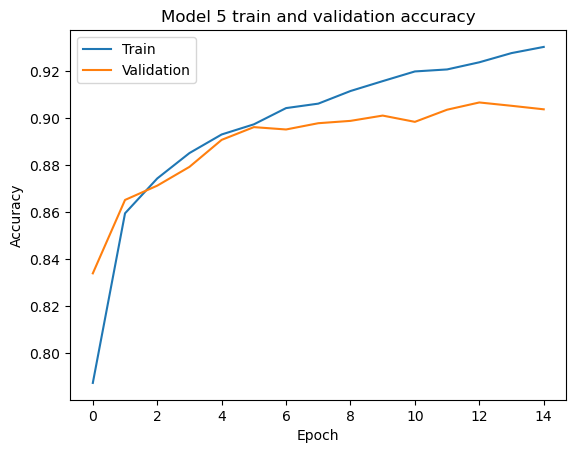

In [235]:
plot_loss(history5, "Model 5")

# Results

In [252]:
print(f"Baseline Validation accuracy: {np.max(history.history['val_accuracy'])}")
print(f"Model 2 Validation accuracy: {np.max(history2.history['val_accuracy'])}")
print(f"Model 3 Validation accuracy: {np.max(history3.history['val_accuracy'])}")
print(f"Model 4 Validation accuracy: {np.max(history4.history['val_accuracy'])}")
print(f"Model 5 Validation accuracy: {np.max(history5.history['val_accuracy'])}")

Baseline Validation accuracy: 0.9084166884422302
Model 2 Validation accuracy: 0.9109166860580444
Model 3 Validation accuracy: 0.9070833325386047
Model 4 Validation accuracy: 0.9075833559036255
Model 5 Validation accuracy: 0.9066666960716248


# Testing

Dropout model (best one)

In [237]:
print("Testing the dropout model (best model)")
_, test_acc = model2.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model2.predict(x_test)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))


Testing the dropout model (best model)
313/313 - 1s - loss: 0.2576 - accuracy: 0.9071 - 1s/epoch - 5ms/step

Test accuracy: 0.9071000218391418
313/313 [==============================] - 1s 4ms/step
Precision:  0.9082637359093674
Recall:  0.9071000000000001
[[811   0  21  17   2   3 141   0   5   0]
 [  0 976   1  15   2   0   4   0   2   0]
 [ 14   0 882   9  43   0  51   0   1   0]
 [ 10   6  10 919  12   0  39   0   4   0]
 [  0   1  45  42 852   0  57   0   3   0]
 [  0   0   0   0   0 981   0  16   0   3]
 [ 81   0  67  23  68   0 756   0   5   0]
 [  0   0   0   0   0  13   0 970   0  17]
 [  1   1   2   4   2   4   5   5 976   0]
 [  1   0   0   0   0   5   0  46   0 948]]


Baseline model (second-best one)

In [238]:
print("Testing the baseline model (second best model)")

_, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))

Testing the baseline model (second best model)
313/313 - 1s - loss: 0.3344 - accuracy: 0.8953 - 1s/epoch - 5ms/step

Test accuracy: 0.8952999711036682
313/313 [==============================] - 1s 4ms/step
Precision:  0.8970981104465888
Recall:  0.8953000000000001
[[872   0  20  10   3   1  89   0   5   0]
 [  7 968   1  17   4   0   2   0   1   0]
 [ 23   0 863   5  44   0  63   0   2   0]
 [ 38   8  17 853  22   1  58   0   3   0]
 [  3   1  76  28 808   0  82   0   2   0]
 [  4   0   0   0   0 970   0  20   0   6]
 [122   0  70  18  52   1 729   0   8   0]
 [  0   0   0   0   0  14   0 969   0  17]
 [  5   0   6   2   2   5   3   4 973   0]
 [  1   0   0   0   0   8   0  43   0 948]]


In [239]:
# saving the model's weights
model.save_weights('./Models/model_weights.h5')
model2.save_weights('./Models/model2_weights.h5')
model3.save_weights('./Models/model3_weights.h5')
model4.save_weights('./Models/model4_weights.h5')
model5.save_weights('./Models/model5_weights.h5')


# Choice 6: Using another dataset

In [240]:
import pandas as pd
import cv2 as cv
import os

In [241]:
df = pd.read_csv('archive/styles.csv', error_bad_lines=False)

# filter out columns that are not 'id' nor 'articleType'
df = df.filter(items=['id', 'articleType'])

conversion = {
    "Tshirts": 0,
    "Tops": 0,
    "Lounge Tshirts": 0,
    "Jeans": 1,
    "Track Pants": 1,
    "Trousers": 1,
    "Lounge Pants": 1,
    "Leggings": 1,
    "Rain Trousers": 1,
    "Sweaters": 2,
    "Dresses": 3,
    "Waistcoat": 4,
    "Rain Jacket": 4,
    "Jackets": 4,
    "Nehru Jackets": 4,
    "Sandals": 5,
    "Sports Sandals": 5,
    "Shirts": 6,
    "Sweatshirts": 6,
    "Casual Shoes": 7,
    "Sports Shoes": 7,
    "Handbags": 8,
    "Duffel Bag": 8,
    "Booties": 9,
}

C:\Users\bais_\AppData\Local\Temp\ipykernel_4176\3965901089.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('archive/styles.csv', error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33

In [242]:
def preprocess_image(image_path):
    # Load the image
    image = cv.imread(image_path)
    height, width = image.shape[:2]
    aspect_ratio = float(width) / float(height)

    # background removal
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ret, mask = cv.threshold(gray, 240, 255, cv.THRESH_BINARY)
    mask = cv.bitwise_not(mask)
    result = cv.bitwise_and(gray, gray, mask=mask)
    # Replace the background with black
    result[mask == 0] = 0

    # calculating the new dimensions for 28x28 while maintaining the aspect ratio
    if aspect_ratio > 1:
        new_width = 28
        new_height = int(round(new_width / aspect_ratio))
    else:
        new_height = 28
        new_width = int(round(new_height * aspect_ratio))

    # resizing the image using the calculated dimensions
    resized_img = cv.resize(result, (new_width, new_height), interpolation=cv.INTER_AREA)

    # adding padding to make the image 28x28
    padding_x1 = (28 - new_width) // 2
    padding_y1 = (28 - new_height) // 2
    padding_x2 = 28 - new_width - padding_x1
    padding_y2 = 28 - new_height - padding_y1

    resized_img = cv.copyMakeBorder(resized_img, padding_y1, padding_y2, padding_x1, padding_x2, cv.BORDER_CONSTANT)

    # normalization
    normalized_image = resized_img / 255.0

    return normalized_image

In [243]:
x_other = []
y_other = []
for i in range(len(df)):
    id_item = df.iloc[i, 0]
    articleType = df.iloc[i, 1]
    img_path = f'archive/images/{id_item}.jpg'
    exists = os.path.isfile(img_path)
    if articleType in conversion and exists:
        x_other.append(preprocess_image(f'archive/images/{id_item}.jpg'))
        y_other.append(conversion[articleType])

x_other = np.array(x_other)
y_other = to_categorical(np.array(y_other))

## Testing on the other dataset

In [244]:
test_loss, test_acc = model2.evaluate(x_other, y_other, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model2.predict(x_other)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_other, axis=1)



print("Precision: ", precision_score(y_test, predictions, average='macro'))
print("Recall: ", recall_score(y_test, predictions, average='macro'))

print(confusion_matrix(y_test, predictions))

712/712 - 3s - loss: 3.2589 - accuracy: 0.2378 - 3s/epoch - 4ms/step

Test accuracy: 0.2378043383359909
712/712 [==============================] - 3s 5ms/step
Precision:  0.23915868508367816
Recall:  0.2745834067471362
[[1453   26   71 3052  207  168 1812    3 2036    3]
 [  40  853    0  747    0    6   13    0   22    1]
 [  14    0    3  129    3    3   58    0   67    0]
 [  35    3    0  323    7    3    4    3   86    0]
 [   6    3    6  145    7    5   28    2   94    0]
 [ 187    0    0    5    0  233    2   93  444    0]
 [  91    3   15 1312  125   67 1055    2  830    0]
 [ 490    0    1  103    1 1387   38    9 2852    0]
 [  89    0    3   41    3  196   34    6 1475    0]
 [   0    0    0    0    0    8    0    0    4    0]]


In [245]:
occurrences = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, p in enumerate(predictions):
    if p != y_test[i]:
        occurrences[y_test[i]] += 1

percentages = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    percentages[i] = occurrences[i] / np.sum(y_test == i)
print(percentages)

[0.8354659721435851, 0.4928656361474435, 0.9891696750902527, 0.30387931034482757, 0.9763513513513513, 0.758298755186722, 0.6985714285714286, 0.9981561155500922, 0.2014076881429345, 1.0]
